<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Xgboost-Base-Model" data-toc-modified-id="Xgboost-Base-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Xgboost Base Model</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Base-Model-Cross_Val_Score" data-toc-modified-id="Base-Model-Cross_Val_Score-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Base Model Cross_Val_Score</a></span></li></ul></li><li><span><a href="#XGBoost-Parameter-Optimization" data-toc-modified-id="XGBoost-Parameter-Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>XGBoost Parameter Optimization</a></span></li><li><span><a href="#Plot-feature-importance" data-toc-modified-id="Plot-feature-importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot feature importance</a></span></li><li><span><a href="#Drop-columns-&amp;-Tune-Model" data-toc-modified-id="Drop-columns-&amp;-Tune-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Drop columns &amp; Tune Model</a></span><ul class="toc-item"><li><span><a href="#Cross_Val_Score" data-toc-modified-id="Cross_Val_Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Cross_Val_Score</a></span></li></ul></li><li><span><a href="#Predict-with-new-data" data-toc-modified-id="Predict-with-new-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predict with new data</a></span></li><li><span><a href="#Draw-XGBoost-Tree" data-toc-modified-id="Draw-XGBoost-Tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Draw XGBoost Tree</a></span></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Cluster Analysis</a></span></li><li><span><a href="#Random-samples-Data" data-toc-modified-id="Random-samples-Data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Random samples Data</a></span></li></ul></div>

## Data Visualization

In [3]:
pip install xgboost

In [2]:
# Import general library

import numpy as np # linear algebra
from numpy import sqrt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from datetime import date, timedelta
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from math import sqrt

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost
import warnings
from numpy import mean
from numpy import std
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Import Data

sample_submission = pd.read_csv('sampleSubmission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [8]:
sample_submission

id churn
0      1   yes
1      2    no
2      3    no
3      4   yes
4      5   yes
..   ...   ...
745  746   yes
746  747   yes
747  748    no
748  749   yes
749  750   yes

[750 rows x 2 columns]

In [9]:
test

id state  account_length      area_code international_plan  \
0      1    KS             128  area_code_415                 no   
1      2    AL             118  area_code_510                yes   
2      3    IA              62  area_code_415                 no   
3      4    VT              93  area_code_510                 no   
4      5    NE             174  area_code_415                 no   
..   ...   ...             ...            ...                ...   
745  746    GA             130  area_code_415                 no   
746  747    WA              73  area_code_408                 no   
747  748    WV             152  area_code_415                 no   
748  749    DC              61  area_code_415                 no   
749  750    DC             109  area_code_510                 no   

    voice_mail_plan  number_vmail_messages  total_day_minutes  \
0               yes                     25              265.1   
1                no                      0              223.4   
2                no                      0              120.7   
3                no                      0              190.7   
4                no                      0              124.3   
..              ...                    ...                ...   
745              no                      0              119.4   
746              no                      0              177.2   
747              no                      0              184.2   
748              no                      0              140.6   
749              no                      0              188.8   

     total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                110             45.07              197.4               99   
1                 98             37.98              220.6              101   
2                 70             20.52              307.2               76   
3                114             32.42              218.2              111   
4                 76             21.13              277.1              112   
..               ...               ...                ...              ...   
745               99             20.30              226.3               97   
746              118             30.12              270.5               84   
747               90             31.31              256.8               73   
748               89             23.90              172.8              128   
749               67             32.10              171.7               92   

     total_eve_charge  total_night_minutes  total_night_calls  \
0               16.78                244.7                 91   
1               18.75                203.9                118   
2               26.11                203.0                 99   
3               18.55                129.6                121   
4               23.55                250.7                115   
..                ...                  ...                ...   
745             19.24                202.7                111   
746             22.99                241.8                112   
747             21.83                213.6                113   
748             14.69                212.4                 97   
749             14.59                224.4                 89   

     total_night_charge  total_intl_minutes  total_intl_calls  \
0                 11.01                10.0                 3   
1                  9.18                 6.3                 6   
2                  9.14                13.1                 6   
3                  5.83                 8.1                 3   
4                 11.28                15.5                 5   
..                  ...                 ...               ...   
745                9.12                11.3                 7   
746               10.88                12.3                 2   
747                9.61                14.7                 2   
748                9.56                1

In [10]:
train

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

In [22]:
# Percentage of null values
train.isnull().sum() * 100 / len(train)

state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churn                            0.0
dtype: float64

In [23]:
# Percentage of null values
test.isnull().sum() * 100 / len(test)

id                               0.0
state                            0.0
account_length                   0.0
area_code                        0.0
international_plan               0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
dtype: float64

In [24]:
train.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

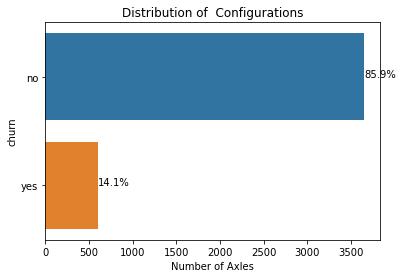

In [29]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')
    total = len(df[column])
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
    
bar_plot(train, "churn")

In [43]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [ ]:
f, axarr = plt.subplots(2, figsize=(16,8), sharex=True)
sns.kdeplot(king['zipcode'], shade=True, legend=False,ax=axarr[0])
axarr[0].set_ylabel('Density')
sns.scatterplot(x=king['zipcode'],y=king['price'],ax=axarr[1])
plt.show()

In [15]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [18]:
train_for_EDA = train.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan'], axis = 1).copy()
train_for_EDA

account_length  number_vmail_messages  total_day_minutes  \
0                107                     26              161.6   
1                137                      0              243.4   
2                 84                      0              299.4   
3                 75                      0              166.7   
4                121                     24              218.2   
...              ...                    ...                ...   
4245              83                      0              188.3   
4246              73                      0              177.9   
4247              75                      0              170.7   
4248              50                     40              235.7   
4249              86                     34              129.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                 123             27.47              195.5              103   
1                 114             41.38              121.2              110   
2                  71             50.90               61.9               88   
3                 113             28.34              148.3              122   
4                  88             37.09              348.5              108   
...               ...               ...                ...              ...   
4245               70             32.01              243.8               88   
4246               89             30.24              131.2               82   
4247              101             29.02              193.1              126   
4248              127             40.07              223.0              126   
4249              102             22.00              267.1              104   

      total_eve_charge  total_night_minutes  total_night_calls  \
0                16.62                254.4                103   
1                10.30                162.6                104   
2                 5.26                196.9                 89   
3                12.61                186.9                121   
4                29.62                212.6                118   
...                ...                  ...                ...   
4245             20.72                213.7                 79   
4246             11.15                186.2                 89   
4247             16.41                129.1                104   
4248             18.96                297.5                116   
4249             22.70                154.8                100   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.45                13.7                 3   
1                   7.32                12.2                 5   
2                   8.86                 6.6                 7   
3                   8.41                10.1                 3   
4                   9.57                 7.5                 7   
...                  ...                 ...               ...   
4245                9.62                10.3                 6   
4246                8.38                11.5                 6   
4247                5.81                 6.9                 7   
4248               13.39                 9.9                 5   
4249                6.97                 9.3                16   

      total_intl_charge  number_customer_service_calls churn  
0                  3.70                              1    no  
1                  3.29                              0    no  
2                  1.78                              2    no  
3                  2.73                              3    no  
4                  2.03                              3    no  
...                 ...                            ...   ...  
4245               2.78                              0    no  
4246               3.11                              3    no  
4247               1.86                              1    no  
4248               2.67                         

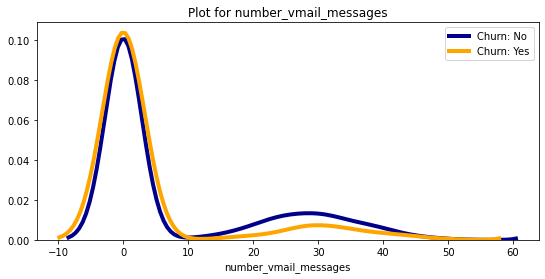

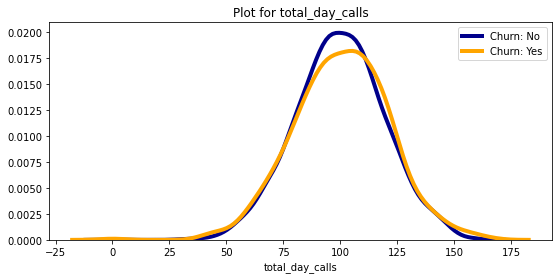

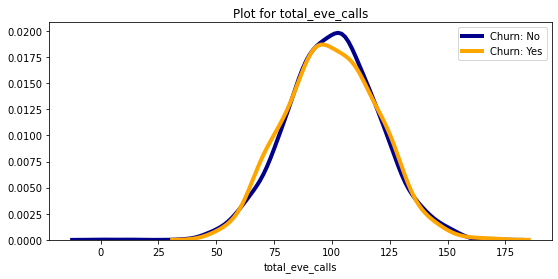

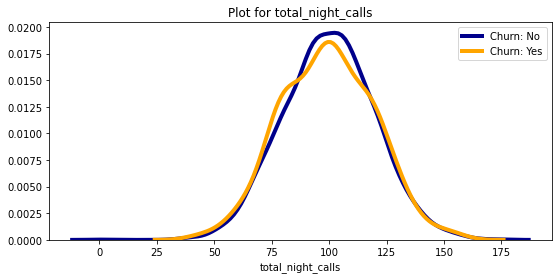

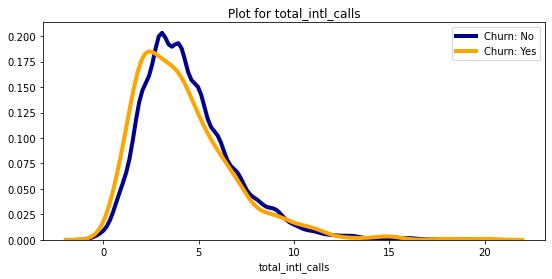

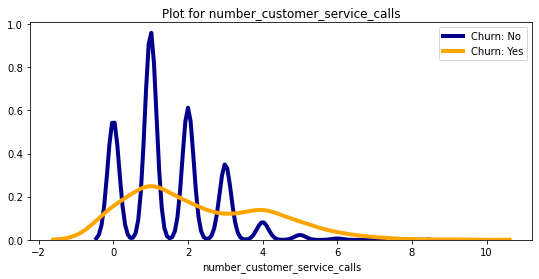

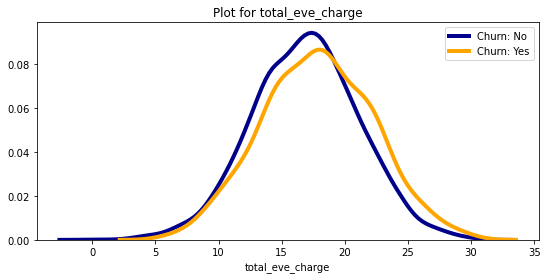

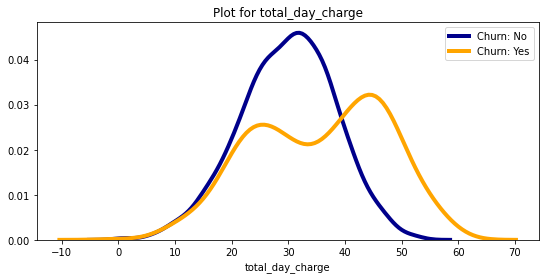

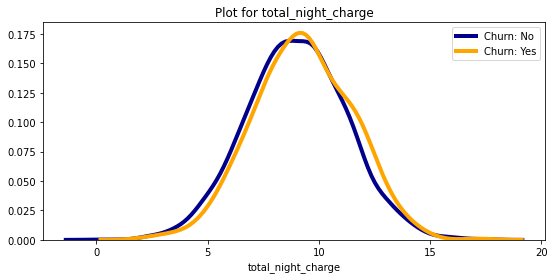

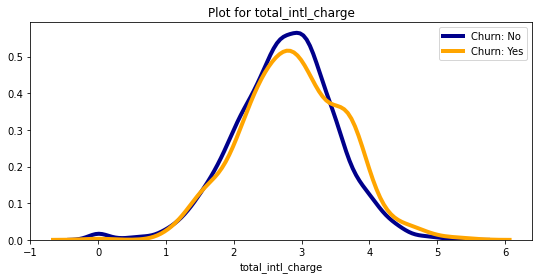

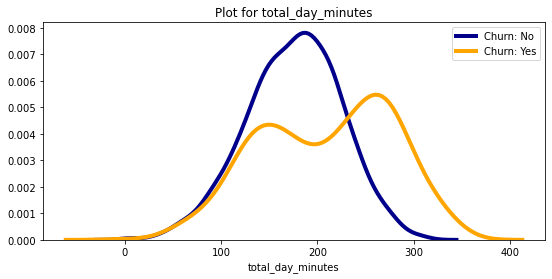

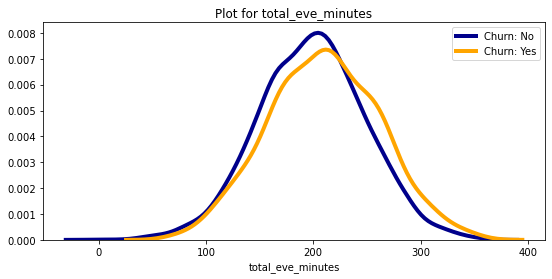

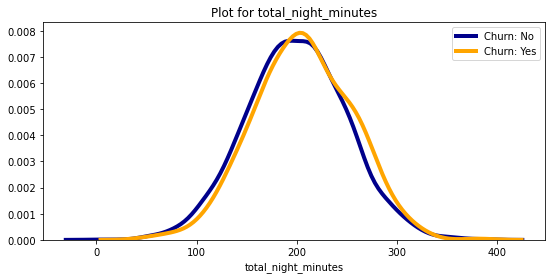

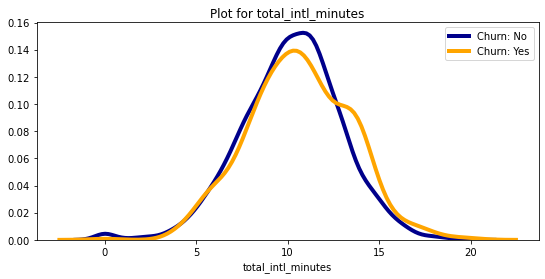

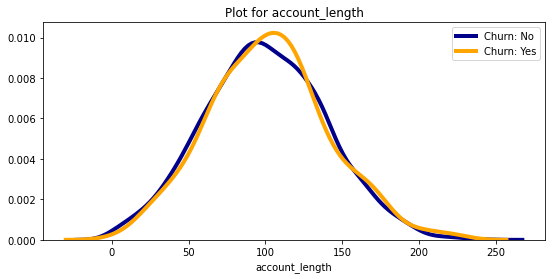

In [21]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(train[train['churn'] == 'no'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(train[train['churn'] == 'yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.savefig('kde.png')
    
kdeplot('number_vmail_messages', hist = False, kde = True)
kdeplot('total_day_calls', hist = False, kde = True)
kdeplot('total_eve_calls', hist = False, kde = True)
kdeplot('total_night_calls', hist = False, kde = True)
kdeplot('total_intl_calls', hist = False, kde = True)
kdeplot('number_customer_service_calls', hist = False, kde = True)
kdeplot('total_eve_charge', hist = False, kde = True)
kdeplot('total_day_charge', hist = False, kde = True)
kdeplot('total_night_charge', hist = False, kde = True)
kdeplot('total_intl_charge', hist = False, kde = True)
kdeplot('total_day_minutes', hist = False, kde = True)
kdeplot('total_eve_minutes', hist = False, kde = True)
kdeplot('total_night_minutes', hist = False, kde = True)
kdeplot('total_intl_minutes', hist = False, kde = True)
kdeplot('account_length', hist = False, kde = True)


# from observation, the minutes, and charge is proportional to each other. can omit one of it.
# no.customer service, and day m

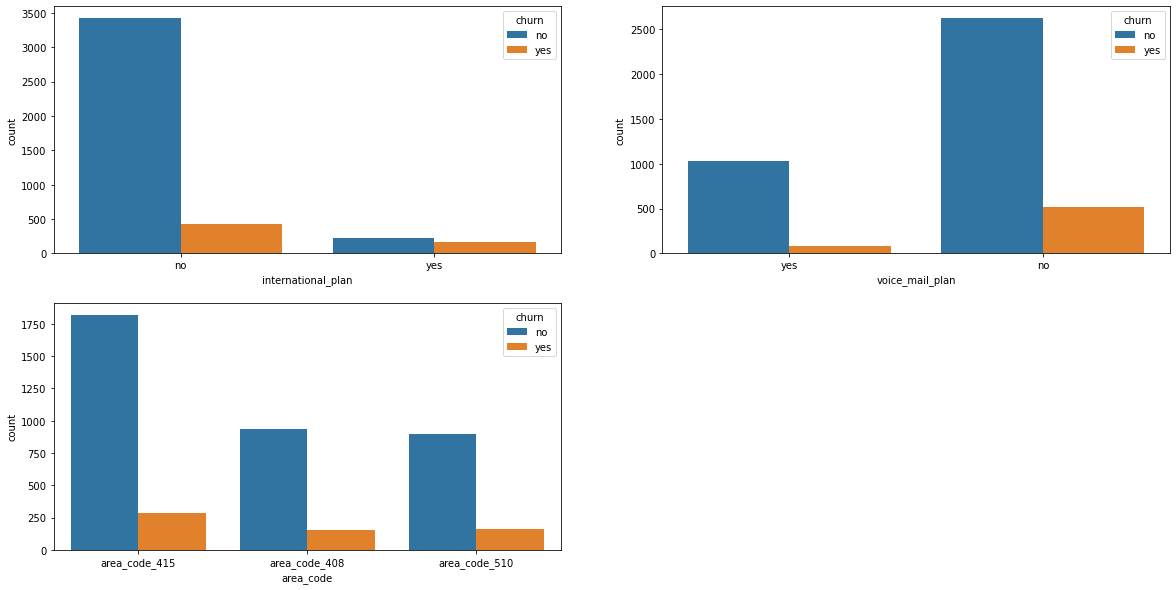

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot("international_plan", data=train,hue='churn', ax=axes[0,0])
sns.countplot("voice_mail_plan", data=train,hue='churn', ax=axes[0,1])
sns.countplot("area_code", data=train,hue='churn', ax=axes[1,0])

fig.delaxes(axes[1][1])

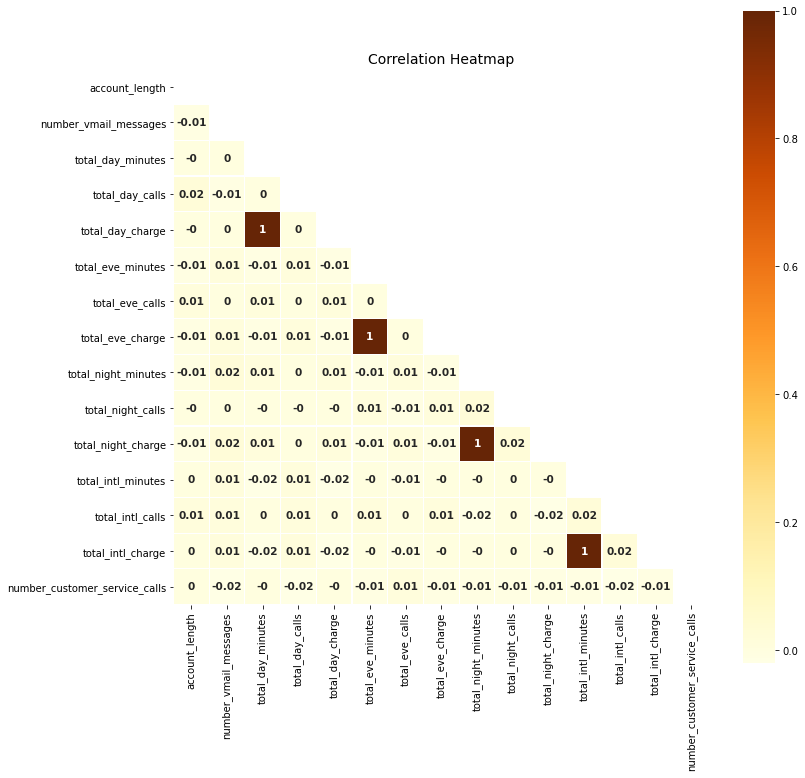

In [4]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
var_corr = round(train.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

## Data Preprocessing

In [3]:
## Check unique value for each columns in pandas, remove column if there is only 1 value in the column
## In this data, no columns with only 1 value in each column

for col in train:
    xlist = [] 
    print(col)
    print (len(train[col].unique()))


state
51
account_length
215
area_code
3
international_plan
2
voice_mail_plan
2
number_vmail_messages
46
total_day_minutes
1843
total_day_calls
120
total_day_charge
1843
total_eve_minutes
1773
total_eve_calls
123
total_eve_charge
1572
total_night_minutes
1757
total_night_calls
128
total_night_charge
992
total_intl_minutes
168
total_intl_calls
21
total_intl_charge
168
number_customer_service_calls
10
churn
2


In [4]:
train2 = train.copy()

## Label Encoding
cols = ['state', 'area_code']
#
# Encode labels of multiple columns at once
#
train2[cols] = train2[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
train2.head()

state  account_length  area_code international_plan voice_mail_plan  \
0     35             107          1                 no             yes   
1     31             137          1                 no              no   
2     35              84          0                yes              no   
3     36              75          1                yes              no   
4     19             121          2                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [5]:
# label 'yes'  to 1 , 'no' to zero


train2['international_plan'] = train['international_plan'].map(
                   {'yes':1 ,'no':0})

train2['voice_mail_plan'] = train['voice_mail_plan'].map(
                   {'yes':1 ,'no':0})


train2['churn'] = train['churn'].map(
                   {'yes':1 ,'no':0})

train2

state  account_length  area_code  international_plan  voice_mail_plan  \
0        35             107          1                   0                1   
1        31             137          1                   0                0   
2        35              84          0                   1                0   
3        36              75          1                   1                0   
4        19             121          2                   0                1   
...     ...             ...        ...                 ...              ...   
4245     26              83          1                   0                0   
4246     49              73          0                   0                0   
4247     27              75          0                   0                0   
4248     11              50          0                   0                1   
4249     46              86          1                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245               

In [91]:
train2.dtypes

state                              int32
account_length                     int64
area_code                          int32
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [6]:
## Export label encoded train data
train2.to_csv(r'C:\Users\MLee27\Desktop\Training\06-Jupyter_Practice\10_UMS\WQD7006_Machine_Learning\Label_Encoded_Train_Data.csv',header = True)

In [6]:
test2 = test.copy()

## Label Encoding
cols = ['state', 'area_code']
#
# Encode labels of multiple columns at once
#
test2[cols] = test2[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
test2.head()

test2['international_plan'] = test['international_plan'].map(
                   {'yes':1 ,'no':0})

test2['voice_mail_plan'] = test['voice_mail_plan'].map(
                   {'yes':1 ,'no':0})

test2

id  state  account_length  area_code  international_plan  \
0      1     16             128          1                   0   
1      2      1             118          2                   1   
2      3     12              62          1                   0   
3      4     46              93          2                   0   
4      5     29             174          1                   0   
..   ...    ...             ...        ...                 ...   
745  746     10             130          1                   0   
746  747     47              73          0                   0   
747  748     49             152          1                   0   
748  749      7              61          1                   0   
749  750      7             109          2                   0   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
0                  1                     25              265.1   
1                  0                      0              223.4   
2                  0                      0              120.7   
3                  0                      0              190.7   
4                  0                      0              124.3   
..               ...                    ...                ...   
745                0                      0              119.4   
746                0                      0              177.2   
747                0                      0              184.2   
748                0                      0              140.6   
749                0                      0              188.8   

     total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                110             45.07              197.4               99   
1                 98             37.98              220.6              101   
2                 70             20.52              307.2               76   
3                114             32.42              218.2              111   
4                 76             21.13              277.1              112   
..               ...               ...                ...              ...   
745               99             20.30              226.3               97   
746              118             30.12              270.5               84   
747               90             31.31              256.8               73   
748               89             23.90              172.8              128   
749               67             32.10              171.7               92   

     total_eve_charge  total_night_minutes  total_night_calls  \
0               16.78                244.7                 91   
1               18.75                203.9                118   
2               26.11                203.0                 99   
3               18.55                129.6                121   
4               23.55                250.7                115   
..                ...                  ...                ...   
745             19.24                202.7                111   
746             22.99                241.8                112   
747             21.83                213.6                113   
748             14.69                212.4                 97   
749             14.59                224.4                 89   

     total_night_charge  total_intl_minutes  total_intl_calls  \
0                 11.01                10.0                 3   
1                  9.18                 6.3                 6   
2                  9.14                13.1                 6   
3                  5.83                 8.1                 3   
4                 11.28                15.5                 5   
..                  ...                 ...               ...   
745                9.12                11.3                 7   
746               10.88                12.3                 2   
747                9.61                14.7                 2   
748                9.56                13.6         

## Xgboost Base Model

### Train Test Split

In [53]:
X = train2.drop(['churn'], axis = 1).copy()
y = train2.churn.copy()

In [9]:
sum(y)/len(y)

0.14070588235294118

From the ratio above, we see only <b>14%</b> of the people in the dataset churning. Because of this when we split the data into training and testing, we will split using stratification in order to maintain same percentage of people who churn in both training and testing set. 

In [106]:
X_train, X_test , y_train, y_test =  train_test_split (X, y, test_size = 0.3, random_state = 42, stratify = y)

print (sum(y_train)/len(y_train))
print (sum(y_test)/len(y_test))

0.1408403361344538
0.1403921568627451


In [11]:
classifier = xgboost.XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', seed = 42, eval_metric='mlogloss')

In [12]:
classifier.fit (
        X_train,
        y_train,
        verbose = True,
        early_stopping_rounds = 10,
        eval_metric = 'auc',
        eval_set = [(X_test, y_test)]
    )

[0]	validation_0-auc:0.90231
[1]	validation_0-auc:0.91019
[2]	validation_0-auc:0.91277
[3]	validation_0-auc:0.91896
[4]	validation_0-auc:0.91875
[5]	validation_0-auc:0.91341
[6]	validation_0-auc:0.91569
[7]	validation_0-auc:0.91801
[8]	validation_0-auc:0.91790
[9]	validation_0-auc:0.91760
[10]	validation_0-auc:0.91634
[11]	validation_0-auc:0.91790
[12]	validation_0-auc:0.91698
[13]	validation_0-auc:0.91502


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

Base model with auc with 91.5%

For XGBoost if we have imbalanced data, according to the manual, we need to use the overall performance metric (AUC) of predicton

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



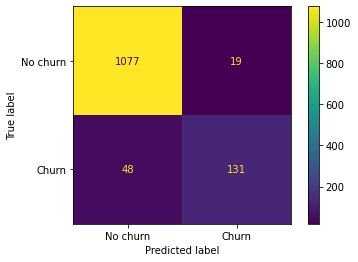

In [13]:
plot_confusion_matrix (
        classifier, 
        X_test,
        y_test,
        values_format = 'd',
        display_labels = ["No churn","Churn"]
    )

In the confusion matrix, there are <b>1096</b> people that did not churn, <b>1077 (98.3%)</b> were correctly classified. And of the <b>179</b> people that churning Telco package, <b>131 (73.2%)</b> were correctly classified. So the XGBoost model still have room for improvement. <br>

Part of the reason could be due to imbalanced data, which we saw in the confusion matrix 1096 people did not churn, and 179 who did. 

We could use <b>scale_pos_weight</b> in XGBoost, that helps with imbalanced data. We will use cross validation to optimize the parameters

In [201]:
xgboost_pred0 = classifier.predict(X_test)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [202]:
target_names = ['CHURN', 'NOT CHURN']
print (classification_report(y_test,xgboost_pred0, target_names=target_names))

              precision    recall  f1-score   support

       CHURN       0.96      0.98      0.97      1096
   NOT CHURN       0.87      0.73      0.80       179

    accuracy                           0.95      1275
   macro avg       0.92      0.86      0.88      1275
weighted avg       0.95      0.95      0.95      1275



### Base Model Cross_Val_Score

In [9]:
X = train2.drop(['churn'], axis = 1).copy()
y = train2.churn.copy()

In [10]:
classifier = xgboost.XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', seed = 42, eval_metric='mlogloss')

In [21]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
score_base_model = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('ROC: %.3f (%.3f)' % (mean(score_base_model), std(score_base_model)))

ROC: 0.958 (0.010)


In [64]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [65]:
conf_mat

array([[3619,   33],
       [ 136,  462]], dtype=int64)

In [73]:
for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
    cvs = cross_val_score(classifier, X, y, scoring=score, cv=cv).mean()
    print(score + " : "+ str(cvs))
    warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgbo

roc_auc : 0.9150818669823302


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



f1 : 0.8351409904999259


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



precision : 0.9281327762625734


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



recall : 0.7642372881355932


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



accuracy : 0.9578823529411766


In [18]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

# Non_nested parameter search and scoring
# clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(classifier, X=X, y=y, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3652
           1       0.92      0.76      0.84       598

    accuracy                           0.96      4250
   macro avg       0.94      0.88      0.91      4250
weighted avg       0.96      0.96      0.96      4250



## XGBoost Parameter Optimization

In [253]:
## 1st iteration hyperparameter tuning (Randomized Search)

params = {
        "n_estimators"      : [100,200,300,400],
        "learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
        "max_depth"         : [3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight"  : [1, 3, 5, 7],
        "gamma"             : [0.0, 0.1, 0.2, 0.3, 0.4],
        "reg_lambda"        : [0, 1.0, 10.0],
        "scale_pos_weight"  : [1, 3, 5],
        "verbosity"         : [0, 1, 2, 3] ,
        "subsample"         : [0.3, 0.5, 0.7, 0.9],
        "colsample_bytree"  : [0.3, 0.4, 0.5, 0.7, 0.9],
        "colsample_bylevel" : [0.5, 0.7, 0.9],
        "colsample_bynode"  : [0.5, 0.7, 0.9],
        "reg_alpha"         : [0, 1, 10],
        "bias_score"        : [100, 150, 200]
    }

model = model_selection.RandomizedSearchCV(
        estimator           = classifier,     
        param_distributions = params,
        n_iter              = 10, 
        scoring             = "roc_auc",
        verbose             = 10,
        n_jobs              = -1,
        cv                  = 10,
    )

model.fit(X_train, y_train)
print (model.best_score_)
print (model.best_estimator_.get_params())


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.8s finished


[00:19:03] WARNING: ..\src\learner.cc:573: 
Parameters: { "bias_score" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:19:03] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=7
[00:19:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:19:03] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[00:19:03] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 26 extra nodes, 2 pruned nodes, max_depth=7
[00:19:03] INFO: ..\src\tree\updater_prune.cc:101: tree pruning end, 20 extra

In [254]:
model.best_params_

{'verbosity': 3,
 'subsample': 0.7,
 'scale_pos_weight': 1,
 'reg_lambda': 1.0,
 'reg_alpha': 10,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.7,
 'colsample_bynode': 0.7,
 'colsample_bylevel': 0.9,
 'bias_score': 200}

In [92]:
## 2nd iteration hyperparameter tuning (Randomized Search)

params = { 
        "n_estimators"   : [400, 500, 600],
        "learning_rate"     : [0.15],
        "max_depth"         : [15, 20, 25],
        "min_child_weight"  : [5],
        "gamma"             : [0.4, 0.5, 0.6],
        "reg_lambda"        : [0],
        "scale_pos_weight"  : [1,
        "verbosity"         : [2] ,
        "subsample"         : [0.7],
        "colsample_bytree"  : [0.9, 1.0],
        "colsample_bylevel" : [0.9, 1.0],
        "colsample_bynode"  : [0.9, 1.0],
        "reg_alpha"         : [0],
        "bias_score"        : [100, 150, 200],
        }
       


model = model_selection.RandomizedSearchCV(
        estimator           = classifier,     
        param_distributions = params,
        n_iter              = 10, 
        scoring             = "roc_auc",
        verbose             = 10,
        n_jobs              = -1,
        cv                  = 10,
    )

model.fit(X_train, y_train)
print (model.best_score_)
print (model.best_estimator_.get_params())


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


[21:44:04] WARNING: ..\src\learner.cc:573: 
Parameters: { "bias_score" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9178450400739564
{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bynode': 1.0, 'colsample_bytree': 1.0, 'gamma': 0.6, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.15, 'max_delta_step': 0, 'max_depth': 25, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 600, 'n_jobs': 4, 'num_parallel_tree': 1, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 5, 'subsample': 0.7, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 1, 'seed': 42, 'eval_metric': 'mlogloss',

In [93]:
model.best_params_

{'verbosity': 1,
 'subsample': 0.7,
 'scale_pos_weight': 5,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'n_estimators': 600,
 'min_child_weight': 5,
 'max_depth': 25,
 'learning_rate': 0.15,
 'gamma': 0.6,
 'colsample_bytree': 1.0,
 'colsample_bynode': 1.0,
 'colsample_bylevel': 0.9,
 'bias_score': 200}

In [94]:
## 3rd iteration hyperparameter tuning (Randomized Search)

params = {
        "n_estimators"      : [600, 700, 800],
        "learning_rate"     : [0.15],
        "max_depth"         : [25, 30, 35],
        "min_child_weight"  : [5],
        "gamma"             : [0.6, 0.7, 0.8],
        "reg_lambda"        : [0],
        "scale_pos_weight"  : [5, 6, 7],
        "verbosity"         : [1] ,
        "subsample"         : [0.7],
        "colsample_bytree"  : [1.0],
        "colsample_bylevel" : [1.0],
        "colsample_bynode"  : [0.9],
        "reg_alpha"         : [0],
        "bias_score"        : [200, 250, 300],
    }

model = model_selection.RandomizedSearchCV(
        estimator           = classifier,     
        param_distributions = params,
        n_iter              = 10, 
        scoring             = "roc_auc",
        verbose             = 10,
        n_jobs              = -1,
        cv                  = 10,
    )

model.fit(X_train, y_train)
print (model.best_score_)
print (model.best_estimator_.get_params())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


[21:49:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "bias_score" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9178450400739564
{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 0.9, 'colsample_bytree': 1, 'gamma': 0.6, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.15, 'max_delta_step': 0, 'max_depth': 30, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 600, 'n_jobs': 4, 'num_parallel_tree': 1, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0, 'scale_pos_weight': 5, 'subsample': 0.7, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 1, 'seed': 42, 'eval_metric': 'mlogloss', 'bi

In [96]:
model.best_params_

{'verbosity': 1,
 'subsample': 0.7,
 'scale_pos_weight': 5,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'n_estimators': 600,
 'min_child_weight': 5,
 'max_depth': 30,
 'learning_rate': 0.15,
 'gamma': 0.6,
 'colsample_bytree': 1,
 'colsample_bynode': 0.9,
 'colsample_bylevel': 1,
 'bias_score': 300}

In [107]:
classifier = xgboost.XGBClassifier(
    use_label_encoder = False,
    objective = 'binary:logistic', 
    seed = 42,
    verbosity = 1,
    subsample = 0.7,
    scale_pos_weight = 5,
    reg_lambda = 0,
    reg_alpha = 0,
    n_estimators = 600,
    min_child_weight = 5,
    max_depth = 30,
    learning_rate = 0.15,
    gamma = 0.6,
    colsample_bytree = 1,
    colsample_bynode = 0.9,
    colsample_bylevel = 1,
)

In [108]:
classifier.fit (
        X_train,
        y_train,
        verbose = True,
        early_stopping_rounds = 10,
        eval_metric = 'auc',
        eval_set = [(X_test, y_test)]
    )

[0]	validation_0-auc:0.87780
[1]	validation_0-auc:0.91568
[2]	validation_0-auc:0.92008
[3]	validation_0-auc:0.91318
[4]	validation_0-auc:0.91372
[5]	validation_0-auc:0.91804
[6]	validation_0-auc:0.92070
[7]	validation_0-auc:0.91714
[8]	validation_0-auc:0.91662
[9]	validation_0-auc:0.91504
[10]	validation_0-auc:0.91797
[11]	validation_0-auc:0.91834
[12]	validation_0-auc:0.92018
[13]	validation_0-auc:0.91910
[14]	validation_0-auc:0.91563
[15]	validation_0-auc:0.91451
[16]	validation_0-auc:0.91270


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.9, colsample_bytree=1, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=30,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=5, seed=42,
              subsample=0.7, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



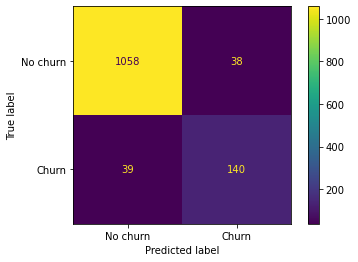

In [257]:
plot_confusion_matrix (
        classifier, 
        X_test,
        y_test,
        values_format = 'd',
        display_labels = ["No churn","Churn"]
    )

In the confusion matrix, there are 1096 people that did not churn, 1058 (96.5 %) were correctly classified. And of the 179 people that churning Telco package, 140 (78.2%) were correctly classified. So the XGBoost model still have room for improvement.

Compare to previous the accuracy for people did not churn was reduce from 98.3% to 96.5%, but the accuracy for people churning increase from 73.2% to 78.2% after hyperparameter tuning. The model keep the good accuracy for people did not churn, while increasing accuracy for predicting people who is churning

In [207]:
xgboost_pred = classifier.predict(X_test)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [208]:
target_names = ['CHURN', 'NOT CHURN']
print (classification_report(y_test,xgboost_pred, target_names=target_names))

              precision    recall  f1-score   support

       CHURN       0.96      0.97      0.96      1096
   NOT CHURN       0.79      0.78      0.78       179

    accuracy                           0.94      1275
   macro avg       0.88      0.87      0.87      1275
weighted avg       0.94      0.94      0.94      1275



## Plot feature importance

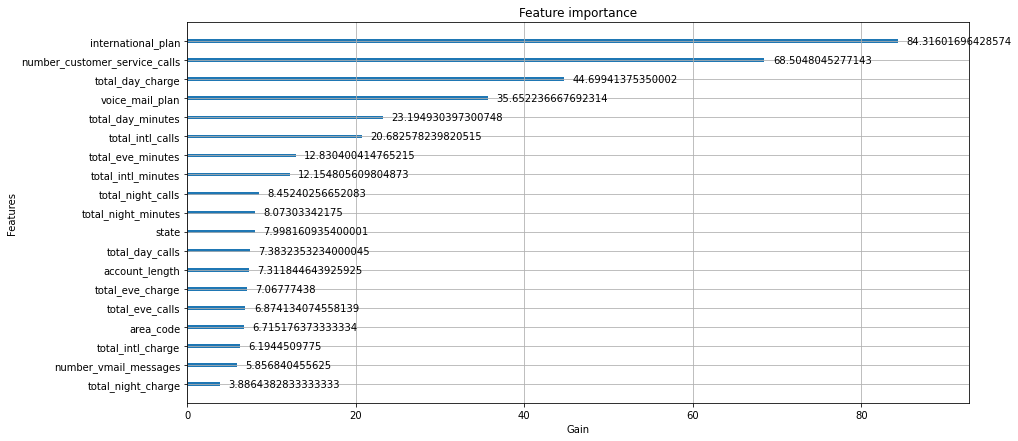

In [46]:
plt.rcParams["figure.figsize"] = (14,7)
xgboost.plot_importance(classifier, importance_type= 'gain', xlabel= 'Gain')

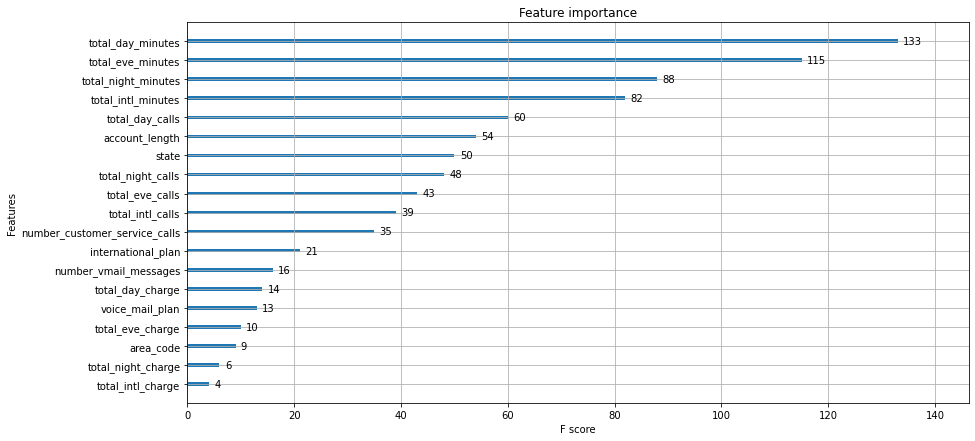

In [47]:
xgboost.plot_importance(classifier)

## Drop columns & Tune Model

In [22]:
X = train2.drop(['total_eve_charge', 'total_day_charge', 'total_night_charge', 'total_intl_charge','churn'], axis = 1).copy()
y = train2.churn.copy()

In [31]:
X_train, X_test , y_train, y_test =  train_test_split (X, y, test_size = 0.3, random_state = 42, stratify = y)

print (sum(y_train)/len(y_train))
print (sum(y_test)/len(y_test))

0.1408403361344538
0.1403921568627451


In [32]:
classifier = xgboost.XGBClassifier(
    use_label_encoder = False,
    objective = 'binary:logistic', 
    seed = 42,
    verbosity = 1,
    subsample = 0.7,
    scale_pos_weight = 5,
    reg_lambda = 0,
    reg_alpha = 0,
    n_estimators = 600,
    min_child_weight = 5,
    max_depth = 30,
    learning_rate = 0.15,
    gamma = 0.6,
    colsample_bytree = 1,
    colsample_bynode = 0.9,
    colsample_bylevel = 1,
)

In [33]:
classifier.fit (
        X_train,
        y_train,
        verbose = True,
        early_stopping_rounds = 10,
        eval_metric = 'auc',
        eval_set = [(X_test, y_test)]
    )

[0]	validation_0-auc:0.87799
[1]	validation_0-auc:0.91132
[2]	validation_0-auc:0.91315
[3]	validation_0-auc:0.91598
[4]	validation_0-auc:0.91728
[5]	validation_0-auc:0.91246
[6]	validation_0-auc:0.91586
[7]	validation_0-auc:0.91903
[8]	validation_0-auc:0.91938
[9]	validation_0-auc:0.92065
[10]	validation_0-auc:0.92146
[11]	validation_0-auc:0.91908
[12]	validation_0-auc:0.92084
[13]	validation_0-auc:0.92046
[14]	validation_0-auc:0.92179
[15]	validation_0-auc:0.92328
[16]	validation_0-auc:0.92211
[17]	validation_0-auc:0.92121
[18]	validation_0-auc:0.92227
[19]	validation_0-auc:0.92201
[20]	validation_0-auc:0.92122
[21]	validation_0-auc:0.92053
[22]	validation_0-auc:0.92192
[23]	validation_0-auc:0.92017
[24]	validation_0-auc:0.91864


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.9, colsample_bytree=1, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=30,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=5, seed=42,
              subsample=0.7, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



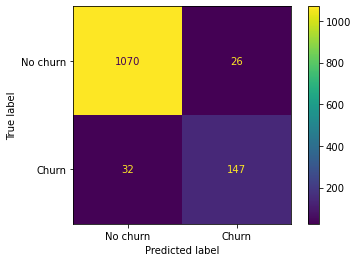

In [34]:
plot_confusion_matrix (
        classifier, 
        X_test,
        y_test,
        values_format = 'd',
        display_labels = ["No churn","Churn"]
    )

After dropping the duplicate columns like total charges in morning, evening, night, and international , which has the proportional relationship with total call minutes. The accuracy improved. 

In the confusion matrix, there are 1096 people that did not churn, 1070 (97.6 %) were correctly classified. And of the 179 people that churning Telco package, 147 (82.1%) were correctly classified. So the XGBoost model still have room for improvement.

Compare to previous the accuracy for people did not churn was reduce from 98.3% (before opt) to 96.5% (aft opt) to 97.6% (after drop columns), but the accuracy for people churning increase from 73.2% (before opt) to 78.2% (after opt) to 82.1% (after drop columns). 

The model keep the good accuracy for people did not churn, while increasing accuracy for predicting people who is churning

In [24]:
xgboost_pred2 = classifier.predict(X_test)
target_names = ['CHURN', 'NOT CHURN']
print (classification_report(y_test,xgboost_pred2, target_names=target_names))

              precision    recall  f1-score   support

       CHURN       0.97      0.98      0.97      1096
   NOT CHURN       0.85      0.82      0.84       179

    accuracy                           0.95      1275
   macro avg       0.91      0.90      0.90      1275
weighted avg       0.95      0.95      0.95      1275



C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



### Cross_Val_Score

In [23]:
X_dropped = train2.drop(['total_eve_charge', 'total_day_charge', 'total_night_charge', 'total_intl_charge','churn'], axis = 1).copy()
y_dropped = train2.churn.copy()

In [24]:
classifier_tune = xgboost.XGBClassifier(
    use_label_encoder = False,
    objective = 'binary:logistic', 
    seed = 42,
    verbosity = 1,
    subsample = 0.7,
    scale_pos_weight = 5,
    reg_lambda = 0,
    reg_alpha = 0,
    n_estimators = 600,
    min_child_weight = 5,
    max_depth = 30,
    learning_rate = 0.15,
    gamma = 0.6,
    colsample_bytree = 1,
    colsample_bynode = 0.9,
    colsample_bylevel = 1,
    eval_metric='mlogloss'
)

In [25]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
score_tune_model = cross_val_score(classifier_tune, X_dropped, y_dropped, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(score_tune_model), std(score_tune_model)))

Accuracy: 0.920 (0.024)


In [106]:
from sklearn.model_selection import cross_val_predict  ## Predict with cross validation
from sklearn.metrics import confusion_matrix
y_pred_tune = cross_val_predict(classifier_tune, X_dropped, y_dropped, cv=cv)
conf_mat = confusion_matrix(y_dropped, y_pred_tune)
conf_mat

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



array([[3588,   64],
       [ 120,  478]], dtype=int64)

In [87]:
for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
    cvs = cross_val_score(classifier_tune, X_dropped, y_dropped, scoring=score, cv=cv).mean()
    print(score + " : "+ str(cvs))

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgbo

roc_auc : 0.919315577259538


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



f1 : 0.8373225593127993


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



precision : 0.885294237769099


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



recall : 0.7993785310734463


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



accuracy : 0.9567058823529413


In [26]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

# Non_nested parameter search and scoring
# clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(classifier_tune, X=X_dropped, y=y_dropped, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3652
           1       0.87      0.80      0.84       598

    accuracy                           0.96      4250
   macro avg       0.92      0.89      0.91      4250
weighted avg       0.95      0.96      0.95      4250



## Predict with new data

In [120]:
test3 = test2.set_index('id')
test3

state  account_length  area_code  international_plan  voice_mail_plan  \
id                                                                           
1       16             128          1                   0                1   
2        1             118          2                   1                0   
3       12              62          1                   0                0   
4       46              93          2                   0                0   
5       29             174          1                   0                0   
..     ...             ...        ...                 ...              ...   
746     10             130          1                   0                0   
747     47              73          0                   0                0   
748     49             152          1                   0                0   
749      7              61          1                   0                0   
750      7             109          2                   0                0   

     number_vmail_messages  total_day_minutes  total_day_calls  \
id                                                               
1                       25              265.1              110   
2                        0              223.4               98   
3                        0              120.7               70   
4                        0              190.7              114   
5                        0              124.3               76   
..                     ...                ...              ...   
746                      0              119.4               99   
747                      0              177.2              118   
748                      0              184.2               90   
749                      0              140.6               89   
750                      0              188.8               67   

     total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
id                                                                            
1               45.07              197.4               99             16.78   
2               37.98              220.6              101             18.75   
3               20.52              307.2               76             26.11   
4               32.42              218.2              111             18.55   
5               21.13              277.1              112             23.55   
..                ...                ...              ...               ...   
746             20.30              226.3               97             19.24   
747             30.12              270.5               84             22.99   
748             31.31              256.8               73             21.83   
749             23.90              172.8              128             14.69   
750             32.10              171.7               92             14.59   

     total_night_minutes  total_night_calls  total_night_charge  \
id                                                                
1                  244.7                 91               11.01   
2                  203.9                118                9.18   
3                  203.0                 99                9.14   
4                  129.6                121                5.83   
5                  250.7                115               11.28   
..                   ...                ...                 ...   
746                202.7                111                9.12   
747                241.8                112               10.88   
748                213.6                113                9.61   
749                212.4                 97                9.56   
750                224.4                 89               10.10   

     total_intl_minutes  total_intl_calls  total_intl_charge  \
id                                                             
1                  10.0                 3               2.70   
2                   6.3                

In [143]:
testing_predictions = classifier.predict(test3)
predict_df = pd.DataFrame (testing_predictions)
predict_df.index +=1
predict_df

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



0
1    0
2    0
3    1
4    0
5    0
..  ..
746  0
747  0
748  0
749  0
750  0

[750 rows x 1 columns]

In [144]:
predict_df.reset_index(inplace= True)
predict_df

index  0
0        1  0
1        2  0
2        3  1
3        4  0
4        5  0
..     ... ..
745    746  0
746    747  0
747    748  0
748    749  0
749    750  0

[750 rows x 2 columns]

In [145]:
predict_df_tidy = predict_df.rename(columns={'index':'id',0:'churn'}, inplace = False)


predict_df_tidy['churn'] = predict_df_tidy['churn'].map(
                   {1:'yes' ,0: 'no'})
predict_df_tidy

id churn
0      1    no
1      2    no
2      3   yes
3      4    no
4      5    no
..   ...   ...
745  746    no
746  747    no
747  748    no
748  749    no
749  750    no

[750 rows x 2 columns]

In [148]:
predict_df_tidy.to_csv(r'C:\Users\MLee27\Desktop\Training\06-Jupyter_Practice\10_UMS\WQD7006_Machine_Learning\predicted_v1.csv', index= False, header = True) 

## Draw XGBoost Tree

In [14]:
classifier = xgboost.XGBClassifier(
                                    use_label_encoder = False,
                                    objective = 'binary:logistic', 
                                    seed = 42,
                                    verbosity = 1,
                                    subsample = 0.7,
                                    scale_pos_weight = 5,
                                    reg_lambda = 0,
                                    reg_alpha = 0,
                                    n_estimators = 1, ## set this to 1, so we can get gain, cover,etc. 
                                    min_child_weight = 5,
                                    max_depth = 30,
                                    learning_rate = 0.15,
                                    gamma = 0.6,
                                    colsample_bytree = 1,
                                    colsample_bynode = 0.9,
                                    colsample_bylevel = 1,
)

classifier.fit(X_train, y_train)

[00:39:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.9, colsample_bytree=1, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=30,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=5, seed=42,
              subsample=0.7, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [37]:
classifier = xgboost.XGBClassifier(
                                    use_label_encoder = False,
                                    objective = 'binary:logistic', 
                                    seed = 42,
                                    verbosity = 1,
                                    subsample = 0.7,
                                    scale_pos_weight = 5,
                                    reg_lambda = 0,
                                    reg_alpha = 0,
                                    n_estimators = 1, ## set this to 1, so we can get gain, cover,etc. 
                                    min_child_weight = 5,
                                    max_depth = 30,
                                    learning_rate = 0.15,
                                    gamma = 0.6,
                                    colsample_bytree = 1,
                                    colsample_bynode = 0.9,
                                    colsample_bylevel = 1,
)

classifier.fit(X_train, y_train)

## now print weight, gain, cover etc. for the tree

bst = classifier.get_booster()
for importance_type in ('weight','gain','cover', 'total_gain','total_cover'):
    print ('%s: ' % importance_type, bst.get_score(importance_type = importance_type))
    
    
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'
              }

leaf_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#e48038'
        }

xgboost.to_graphviz(classifier, num_trees=0, size = "10,10",
                   condition_node_params= node_params,
                   leaf_node_params= leaf_params)

graph_data = xgboost.to_graphviz (classifier, num_treesm_tress = 0, size = "10,10",
                                 condition_node_params= node_params,
                                 leaf_node_params= leaf_params)

graph_data.view(filename= 'xgboost_tree_customer_churn')

[00:57:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
weight:  {'total_day_minutes': 11, 'number_customer_service_calls': 1, 'international_plan': 2, 'total_eve_minutes': 9, 'number_vmail_messages': 4, 'account_length': 1, 'total_day_calls': 4, 'total_night_minutes': 8, 'total_night_calls': 1, 'total_eve_calls': 3, 'total_intl_minutes': 5, 'state': 4, 'total_intl_calls': 1, 'voice_mail_plan': 1, 'area_code': 1}
gain:  {'total_day_minutes': 60.546769926454544, 'number_customer_service_calls': 516.148499, 'international_plan': 248.2655183, 'total_eve_minutes': 27.069336148666665, 'number_vmail_messages': 8.437126633499998, 'account_length': 10.8452148, 'total_day_calls': 6.8909730925, 'total_night_minutes': 16.6287795375, 'total_night_calls': 3.17449951, 'total_eve_calls': 13.411674486666668, 

'xgboost_tree_customer_churn.pdf'

## Cluster Analysis

In [40]:
# remove target & categorial variable for clustering
df_prep = train2.drop(['churn','state','area_code'], axis = 1).copy()
minmax = preprocessing.MinMaxScaler().fit_transform(df_prep)
df_prep2 = pd.DataFrame(minmax, index = df_prep.index, columns = df_prep.columns)

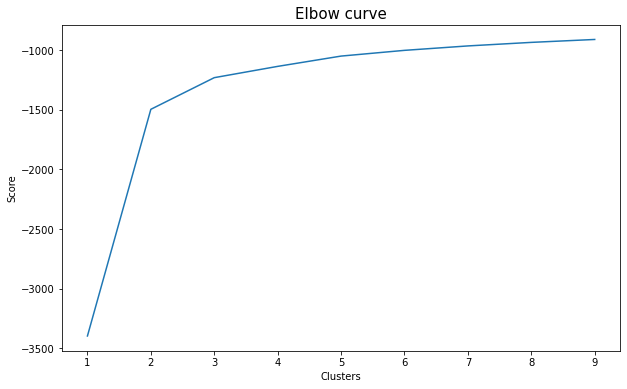

In [69]:
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()
# checking number of clusters

Create_elbow_curve(df_prep2)

from visualization above, with elbow technique we could see the elbow is at cluster 2 

In [82]:
# Create a kmeans objects
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df_prep2)
df_prep2['cluster'] = y_predicted
df_prep2

array([1, 0, 0, ..., 0, 1, 1])

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



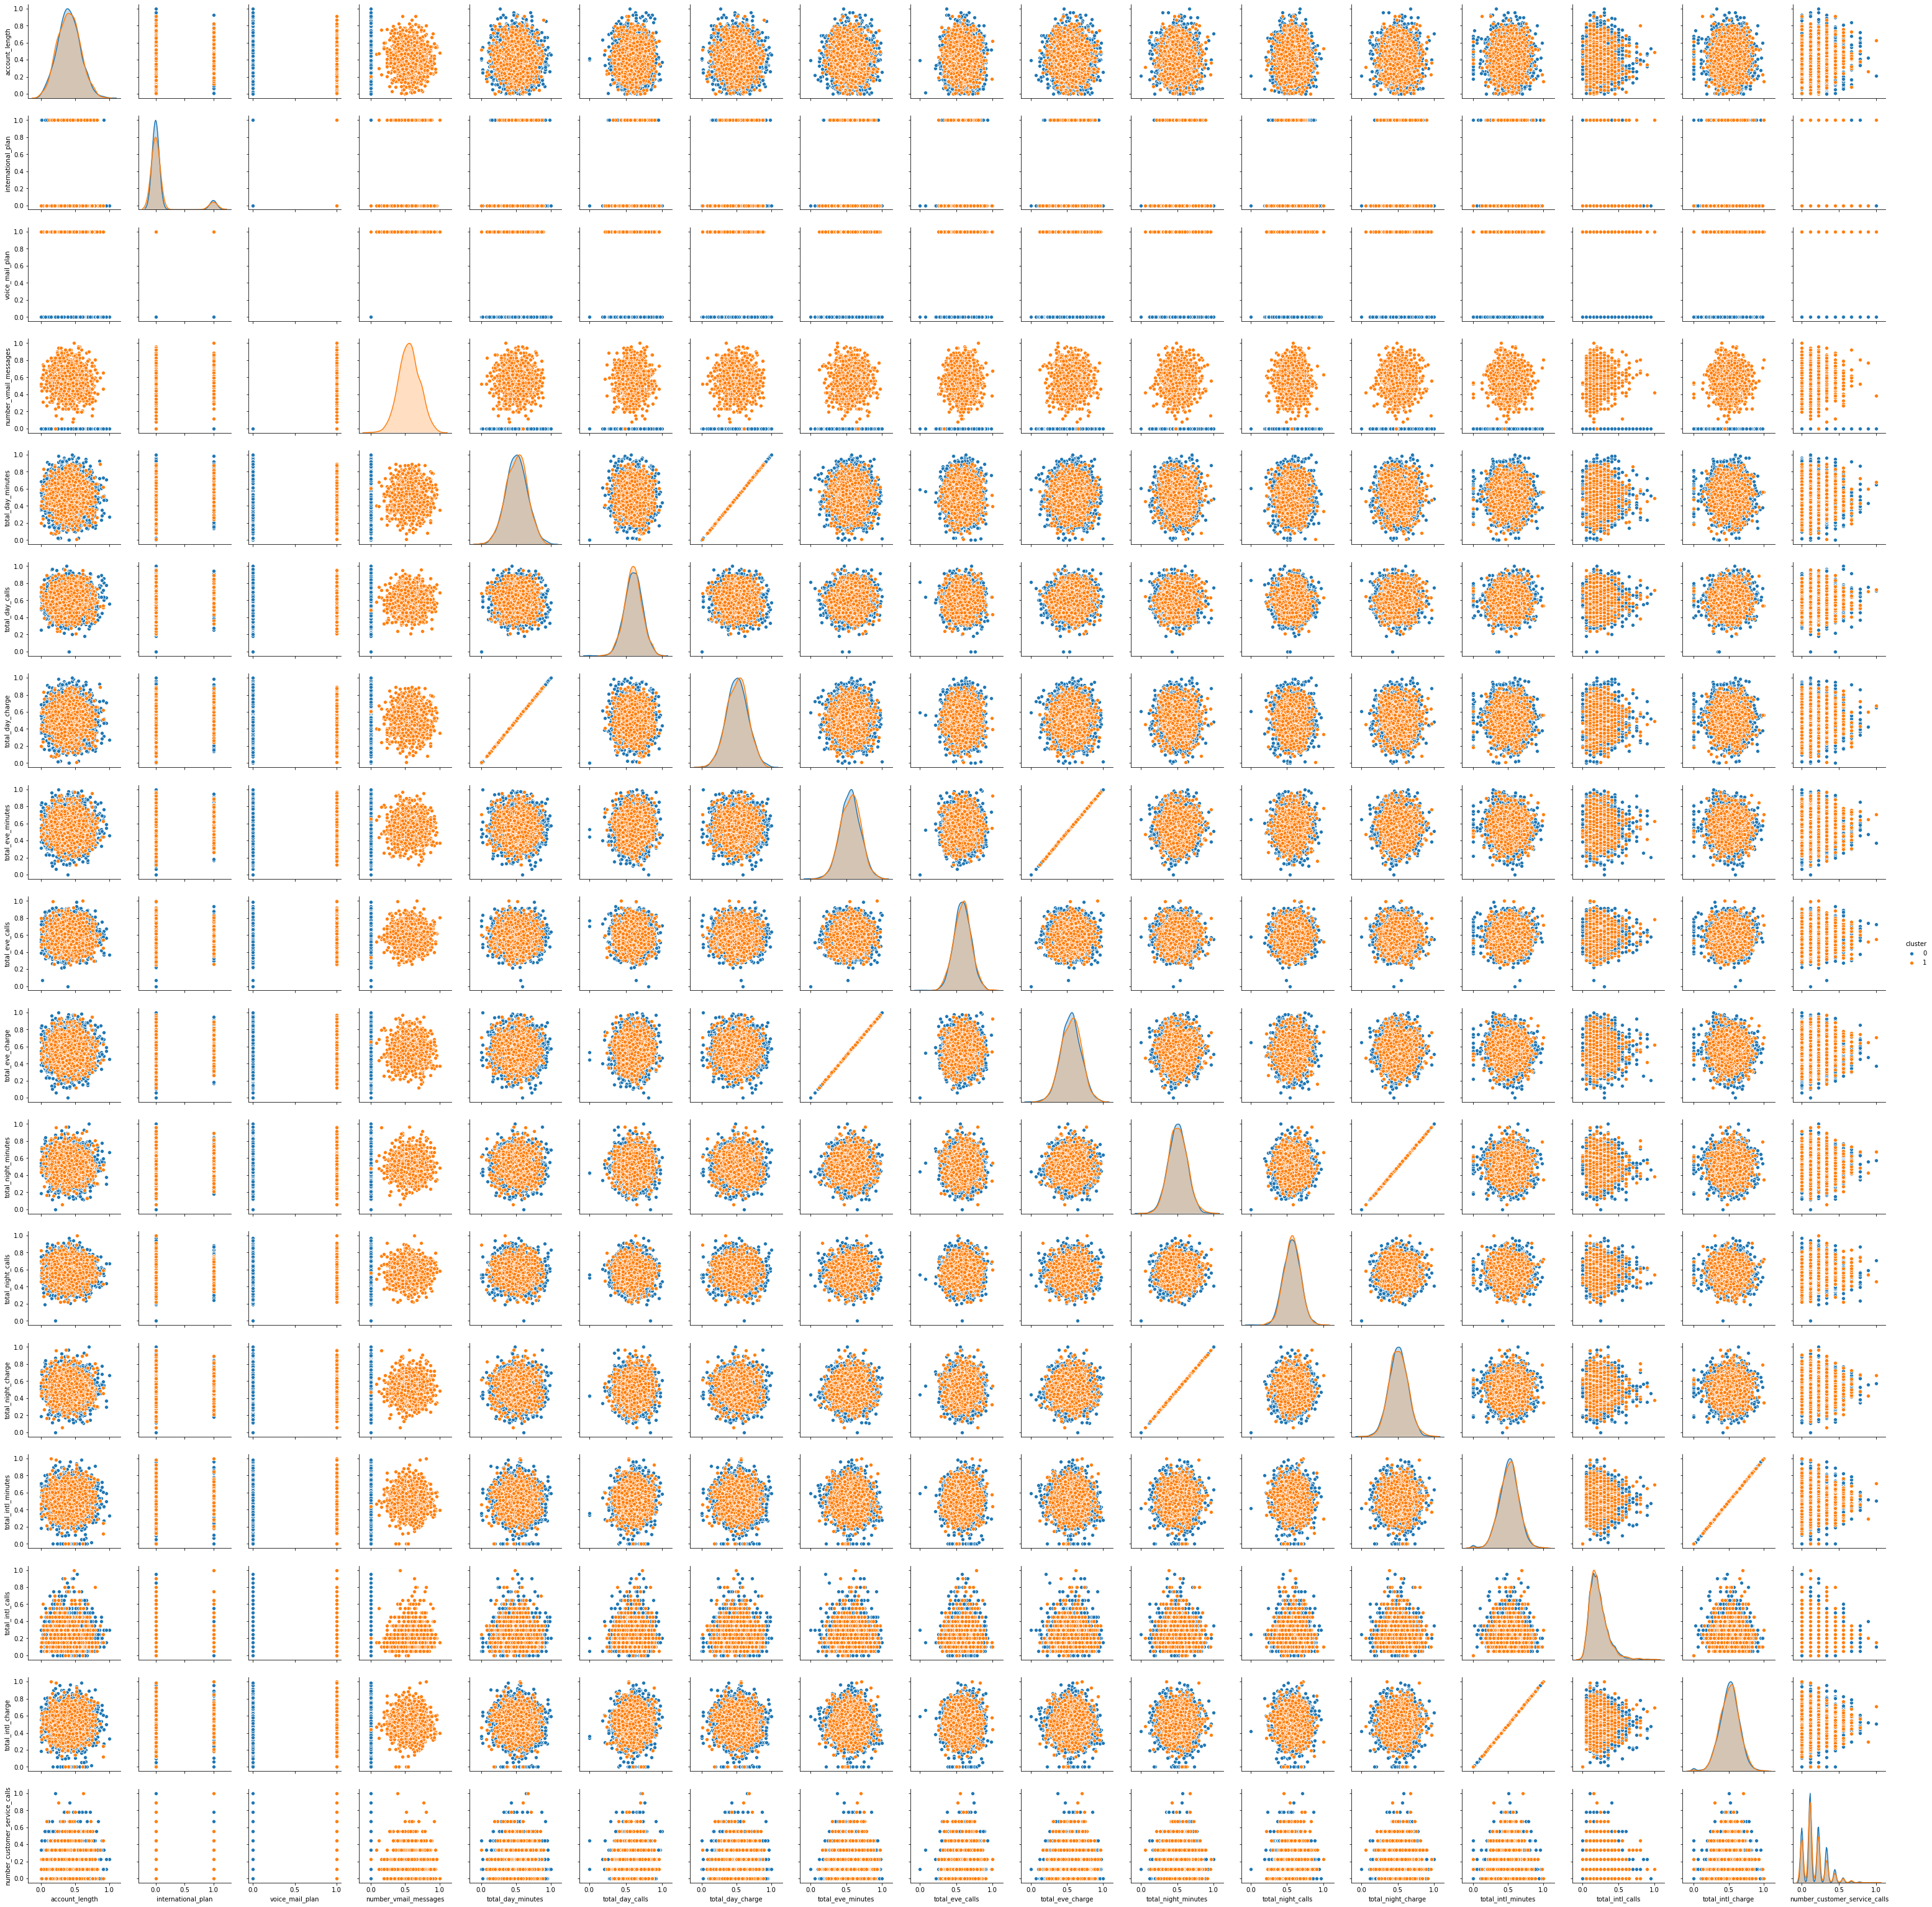

In [84]:
sns.pairplot(df_prep2, hue='cluster')

from observation above, we observed total day charge and minutes, have linear relationship, we could drop them.
Besides, the total day charge and minutes , and calls are hard to be differentiated. Thus i drop accordingly, only keep the column with high feature importance for cluster analysis

In [41]:
# remove target & categorial variable for clustering
df_prep3 = train2[['area_code', 'account_length','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','number_customer_service_calls']].copy()
minmax = preprocessing.MinMaxScaler().fit_transform(df_prep3)
df_prep3 = pd.DataFrame(minmax, index = df_prep3.index, columns = df_prep3.columns)
df_prep3

area_code  account_length  international_plan  voice_mail_plan  \
0           0.5        0.438017                 0.0              1.0   
1           0.5        0.561983                 0.0              0.0   
2           0.0        0.342975                 1.0              0.0   
3           0.5        0.305785                 1.0              0.0   
4           1.0        0.495868                 0.0              1.0   
...         ...             ...                 ...              ...   
4245        0.5        0.338843                 0.0              0.0   
4246        0.0        0.297521                 0.0              0.0   
4247        0.0        0.305785                 0.0              0.0   
4248        0.0        0.202479                 0.0              1.0   
4249        0.5        0.351240                 0.0              1.0   

      number_vmail_messages  total_day_minutes  total_eve_minutes  \
0                  0.500000           0.459744           0.544114   
1                  0.000000           0.692461           0.337323   
2                  0.000000           0.851778           0.172279   
3                  0.000000           0.474253           0.412747   
4                  0.461538           0.620768           0.969942   
...                     ...                ...                ...   
4245               0.000000           0.535704           0.678542   
4246               0.000000           0.506117           0.365154   
4247               0.000000           0.485633           0.537434   
4248               0.769231           0.670555           0.620651   
4249               0.653846           0.368137           0.743390   

      total_night_minutes  total_intl_minutes  number_customer_service_calls  
0                0.644051               0.685                       0.111111  
1                0.411646               0.610                       0.000000  
2                0.498481               0.330                       0.222222  
3                0.473165               0.505                       0.333333  
4                0.538228               0.375                       0.333333  
...                   ...                 ...                            ...  
4245             0.541013               0.515                       0.000000  
4246             0.471392               0.575                       0.333333  
4247             0.326835               0.345                       0.111111  
4248             0.753165               0.495                       0.222222  
4249             0.391899               0.465                       0.000000  

[4250 rows x 10 columns]

In [42]:
# Create a kmeans objects
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df_prep3)
df_prep3['cluster'] = y_predicted
df_prep3

area_code  account_length  international_plan  voice_mail_plan  \
0           0.5        0.438017                 0.0              1.0   
1           0.5        0.561983                 0.0              0.0   
2           0.0        0.342975                 1.0              0.0   
3           0.5        0.305785                 1.0              0.0   
4           1.0        0.495868                 0.0              1.0   
...         ...             ...                 ...              ...   
4245        0.5        0.338843                 0.0              0.0   
4246        0.0        0.297521                 0.0              0.0   
4247        0.0        0.305785                 0.0              0.0   
4248        0.0        0.202479                 0.0              1.0   
4249        0.5        0.351240                 0.0              1.0   

      number_vmail_messages  total_day_minutes  total_eve_minutes  \
0                  0.500000           0.459744           0.544114   
1                  0.000000           0.692461           0.337323   
2                  0.000000           0.851778           0.172279   
3                  0.000000           0.474253           0.412747   
4                  0.461538           0.620768           0.969942   
...                     ...                ...                ...   
4245               0.000000           0.535704           0.678542   
4246               0.000000           0.506117           0.365154   
4247               0.000000           0.485633           0.537434   
4248               0.769231           0.670555           0.620651   
4249               0.653846           0.368137           0.743390   

      total_night_minutes  total_intl_minutes  number_customer_service_calls  \
0                0.644051               0.685                       0.111111   
1                0.411646               0.610                       0.000000   
2                0.498481               0.330                       0.222222   
3                0.473165               0.505                       0.333333   
4                0.538228               0.375                       0.333333   
...                   ...                 ...                            ...   
4245             0.541013               0.515                       0.000000   
4246             0.471392               0.575                       0.333333   
4247             0.326835               0.345                       0.111111   
4248             0.753165               0.495                       0.222222   
4249             0.391899               0.465                       0.000000   

      cluster  
0           1  
1           0  
2           0  
3           0  
4           1  
...       ...  
4245        0  
4246        0  
4247        0  
4248        1  
4249        1  

[4250 rows x 11 columns]

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



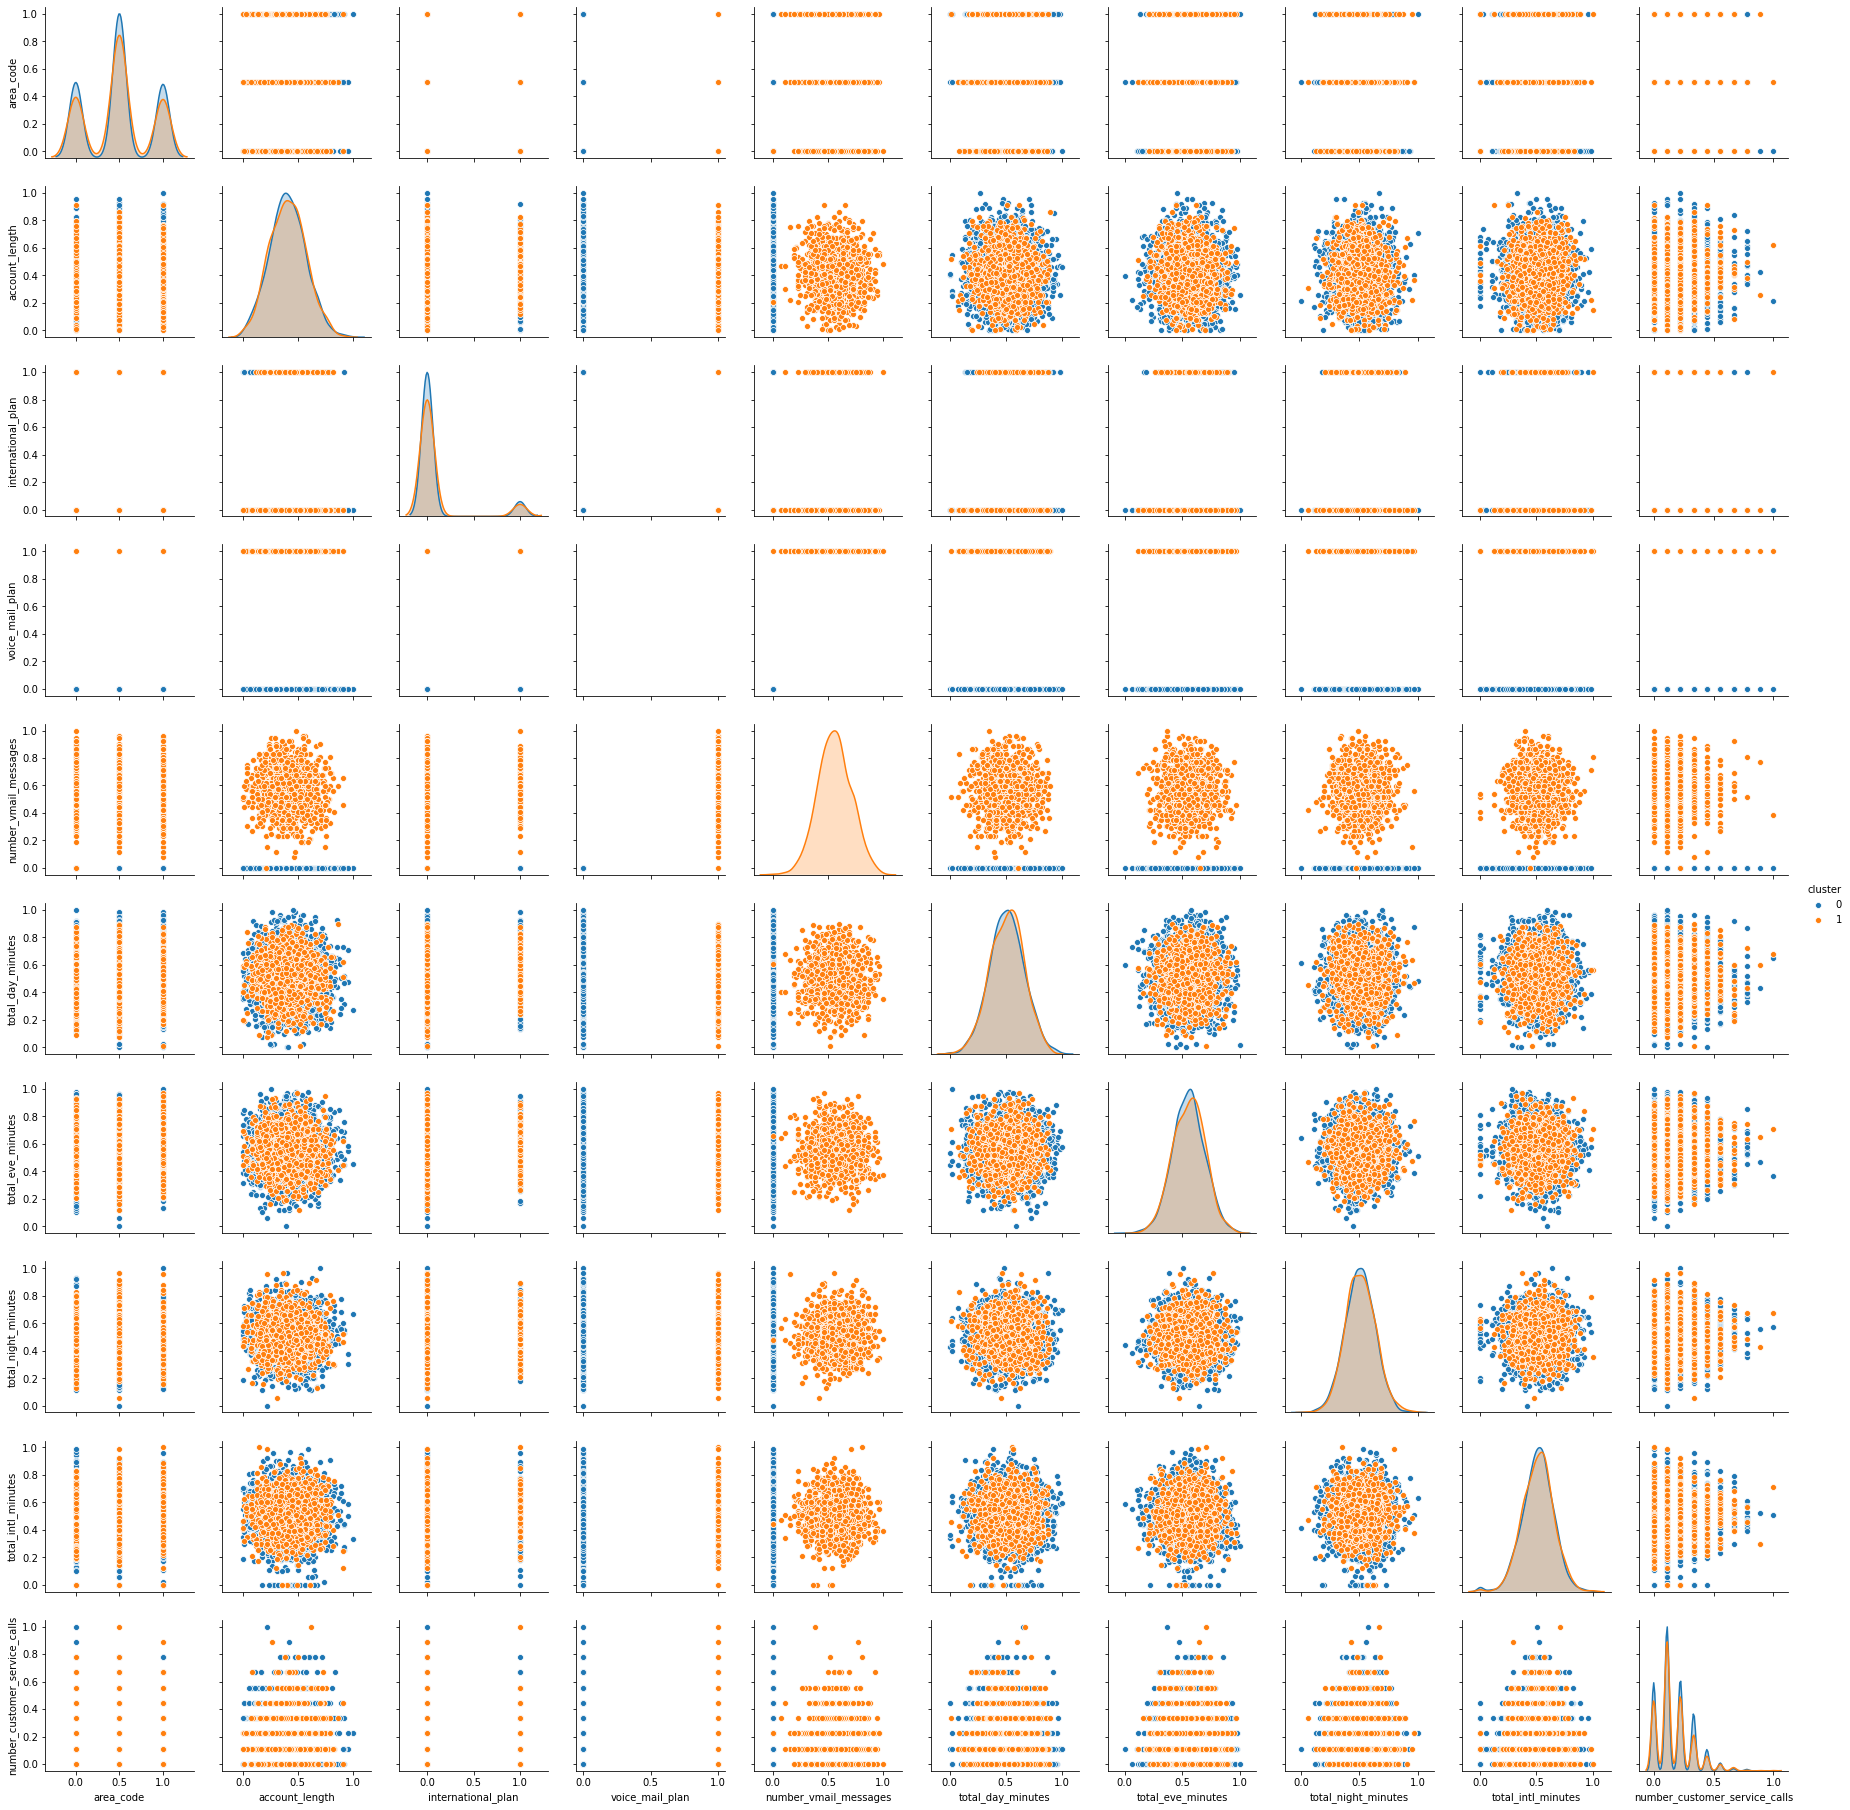

In [43]:
sns.pairplot(df_prep3, hue='cluster')

In [44]:
train2['cluster'] = df_prep3['cluster']
train2

state  account_length  area_code  international_plan  voice_mail_plan  \
0        35             107          1                   0                1   
1        31             137          1                   0                0   
2        35              84          0                   1                0   
3        36              75          1                   1                0   
4        19             121          2                   0                1   
...     ...             ...        ...                 ...              ...   
4245     26              83          1                   0                0   
4246     49              73          0                   0                0   
4247     27              75          0                   0                0   
4248     11              50          0                   0                1   
4249     46              86          1                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  ...  total_eve_charge  \
0                27.47              195.5  ...             16.62   
1                41.38              121.2  ...             10.30   
2                50.90               61.9  ...              5.26   
3                28.34              148.3  ...             12.61   
4                37.09              348.5  ...             29.62   
...                ...                ...  ...               ...   
4245             32.01              243.8  ...             20.72   
4246             30.24              131.2  ...             11.15   
4247             29.02              193.1  ...             16.41   
4248             40.07              223.0  ...             18.96   
4249             22.00              267.1  ...             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9         

In [45]:
df1 = train2[train2['cluster'] == 0]
df2 = train2[train2['cluster'] == 1]

Text(0, 0.5, 'voice_mail_plan')

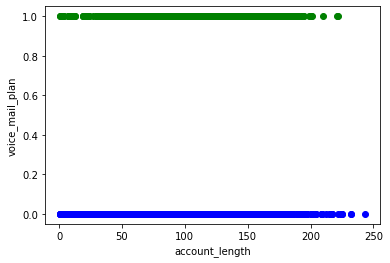

In [51]:
plt.scatter(df1['account_length'],df1['voice_mail_plan'], color ='blue')
plt.scatter(df2['account_length'],df2['voice_mail_plan'], color ='green')

plt.xlabel('account_length')
plt.ylabel('voice_mail_plan')

## Random samples Data

In [3]:
train_random_sample1 = pd.read_csv('Train1.csv')
train_random_sample2 = pd.read_csv('Train2.csv')

In [4]:
train_random_sample1

state  account_length      area_code international_plan voice_mail_plan  \
0       IN              65  area_code_415                 no              no   
1       NY             161  area_code_415                 no              no   
2       CO              77  area_code_408                 no              no   
3       AZ              12  area_code_408                 no              no   
4       MD             135  area_code_408                yes             yes   
...    ...             ...            ...                ...             ...   
1144    OH             145  area_code_408                 no              no   
1145    NM             102  area_code_510                 no             yes   
1146    WY              91  area_code_415                 no              no   
1147    AR             127  area_code_415                 no             yes   
1148    HI              50  area_code_408                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                         0              129.1              137   
1                         0              332.9               67   
2                         0               62.4               89   
3                         0              249.6              118   
4                        41              173.1               85   
...                     ...                ...              ...   
1144                      0              185.9              106   
1145                     18              144.4               76   
1146                      0               34.5               85   
1147                     27              157.6              107   
1148                     40              235.7              127   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                21.95              228.5               83             19.42   
1                56.59              317.8               97             27.01   
2                10.61              169.9              121             14.44   
3                42.43              252.4              119             21.45   
4                29.43              203.9              107             17.33   
...                ...                ...              ...               ...   
1144             31.60              209.7              112             17.82   
1145             24.55              160.7               97             13.66   
1146              5.87              192.3               80             16.35   
1147             26.79              280.6               49             23.85   
1148             40.07              223.0              126             18.96   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   208.8                111                9.40   
1                   160.6                128                7.23   
2                   209.6                 64                9.43   
3                   280.2                 90               12.61   
4                   122.2                 78                5.50   
...                   ...                ...                 ...   
1144                224.7                 87               10.11   
1145                200.8                101                9.04   
1146                256.3                 71               11.53   
1147                 75.1                 77                3.38   
1148                297.5                116               13.39   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   12.7                 6               3.43   
1                    5.4                 9               1.46   
2                    5.7                 6               1.54   
3                   11.8                 3               3.19   
4                   14.6                15               3.94   
...                  ...               ...                ...   
1144  

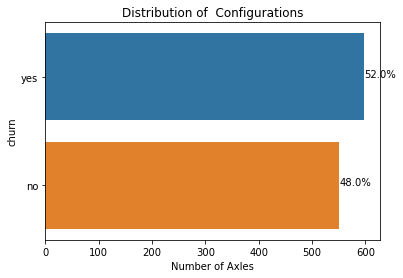

In [90]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')
    total = len(df[column])
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
    
bar_plot(train_random_sample1, "churn")

In [29]:
train_random_sample1_processed = train_random_sample1.copy()

## Label Encoding
cols = ['state', 'area_code']
#
# Encode labels of multiple columns at once
#
train_random_sample1_processed[cols] = train_random_sample1_processed[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
train_random_sample1_processed.head()

state  account_length  area_code international_plan voice_mail_plan  \
0     15              65          1                 no              no   
1     34             161          1                 no              no   
2      5              77          0                 no              no   
3      3              12          0                 no              no   
4     20             135          0                yes             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0              129.1              137   
1                      0              332.9               67   
2                      0               62.4               89   
3                      0              249.6              118   
4                     41              173.1               85   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             21.95              228.5               83             19.42   
1             56.59              317.8               97             27.01   
2             10.61              169.9              121             14.44   
3             42.43              252.4              119             21.45   
4             29.43              203.9              107             17.33   

   total_night_minutes  total_night_calls  total_night_charge  \
0                208.8                111                9.40   
1                160.6                128                7.23   
2                209.6                 64                9.43   
3                280.2                 90               12.61   
4                122.2                 78                5.50   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                12.7                 6               3.43   
1                 5.4                 9               1.46   
2                 5.7                 6               1.54   
3                11.8                 3               3.19   
4                14.6                15               3.94   

   number_customer_service_calls churn  
0                              4   yes  
1                              4   yes  
2                              5   yes  
3                              1   yes  
4                              0   yes

In [30]:
# label 'yes'  to 1 , 'no' to zero


train_random_sample1_processed['international_plan'] = train_random_sample1_processed['international_plan'].map(
                   {'yes':1 ,'no':0})

train_random_sample1_processed['voice_mail_plan'] = train_random_sample1_processed['voice_mail_plan'].map(
                   {'yes':1 ,'no':0})


train_random_sample1_processed['churn'] = train_random_sample1_processed['churn'].map(
                   {'yes':1 ,'no':0})

train_random_sample1_processed

state  account_length  area_code  international_plan  voice_mail_plan  \
0        15              65          1                   0                0   
1        34             161          1                   0                0   
2         5              77          0                   0                0   
3         3              12          0                   0                0   
4        20             135          0                   1                1   
...     ...             ...        ...                 ...              ...   
1144     35             145          0                   0                0   
1145     32             102          2                   0                1   
1146     50              91          1                   0                0   
1147      2             127          1                   0                1   
1148     11              50          0                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                         0              129.1              137   
1                         0              332.9               67   
2                         0               62.4               89   
3                         0              249.6              118   
4                        41              173.1               85   
...                     ...                ...              ...   
1144                      0              185.9              106   
1145                     18              144.4               76   
1146                      0               34.5               85   
1147                     27              157.6              107   
1148                     40              235.7              127   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                21.95              228.5               83             19.42   
1                56.59              317.8               97             27.01   
2                10.61              169.9              121             14.44   
3                42.43              252.4              119             21.45   
4                29.43              203.9              107             17.33   
...                ...                ...              ...               ...   
1144             31.60              209.7              112             17.82   
1145             24.55              160.7               97             13.66   
1146              5.87              192.3               80             16.35   
1147             26.79              280.6               49             23.85   
1148             40.07              223.0              126             18.96   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   208.8                111                9.40   
1                   160.6                128                7.23   
2                   209.6                 64                9.43   
3                   280.2                 90               12.61   
4                   122.2                 78                5.50   
...                   ...                ...                 ...   
1144                224.7                 87               10.11   
1145                200.8                101                9.04   
1146                256.3                 71               11.53   
1147                 75.1                 77                3.38   
1148                297.5                116               13.39   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   12.7                 6               3.43   
1                    5.4                 9               1.46   
2                    5.7                 6               1.54   
3                   11.8                 3               3.19   
4                   14.6                15               3.94   
...                  ...               ...                ...   
1144               

In [98]:
## Export label encoded train data
train_random_sample1_processed.to_csv(r'C:\Users\MLee27\Desktop\Training\06-Jupyter_Practice\10_UMS\WQD7006_Machine_Learning\Label_Encoded_Train_Random_Sampled_Data.csv',header = True)

In [31]:
X_rs = train_random_sample1_processed.drop(['churn'], axis = 1).copy()
y_rs = train_random_sample1_processed.churn.copy()

In [32]:
X_dropped_rs = train_random_sample1_processed.drop(['total_eve_charge', 'total_day_charge', 'total_night_charge', 'total_intl_charge','churn'], axis = 1).copy()
y_dropped_rs = train_random_sample1_processed.churn.copy()

In [108]:
X_dropped_rs

state  account_length  area_code  international_plan  voice_mail_plan  \
0        15              65          1                   0                0   
1        34             161          1                   0                0   
2         5              77          0                   0                0   
3         3              12          0                   0                0   
4        20             135          0                   1                1   
...     ...             ...        ...                 ...              ...   
1144     35             145          0                   0                0   
1145     32             102          2                   0                1   
1146     50              91          1                   0                0   
1147      2             127          1                   0                1   
1148     11              50          0                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                         0              129.1              137   
1                         0              332.9               67   
2                         0               62.4               89   
3                         0              249.6              118   
4                        41              173.1               85   
...                     ...                ...              ...   
1144                      0              185.9              106   
1145                     18              144.4               76   
1146                      0               34.5               85   
1147                     27              157.6              107   
1148                     40              235.7              127   

      total_eve_minutes  total_eve_calls  total_night_minutes  \
0                 228.5               83                208.8   
1                 317.8               97                160.6   
2                 169.9              121                209.6   
3                 252.4              119                280.2   
4                 203.9              107                122.2   
...                 ...              ...                  ...   
1144              209.7              112                224.7   
1145              160.7               97                200.8   
1146              192.3               80                256.3   
1147              280.6               49                 75.1   
1148              223.0              126                297.5   

      total_night_calls  total_intl_minutes  total_intl_calls  \
0                   111                12.7                 6   
1                   128                 5.4                 9   
2                    64                 5.7                 6   
3                    90                11.8                 3   
4                    78                14.6                15   
...                 ...                 ...               ...   
1144                 87                 9.3                 4   
1145                101                 9.3                 4   
1146                 71                 7.9                 7   
1147                 77                 8.0                 4   
1148                116                 9.9                 5   

      number_customer_service_calls  
0                                 4  
1                                 4  
2                                 5  
3                                 1  
4                                 0  
...                             ...  
1144                              2  
1145                              0  
1146                              0  
1147                              1  
1148                              2  

[1149 rows x 15 columns]

In [33]:
classifier_tune_rs = xgboost.XGBClassifier(
    use_label_encoder = False,
    objective = 'binary:logistic', 
    seed = 42,
    verbosity = 1,
    subsample = 0.7,
    scale_pos_weight = 5,
    reg_lambda = 0,
    reg_alpha = 0,
    n_estimators = 600,
    min_child_weight = 5,
    max_depth = 30,
    learning_rate = 0.15,
    gamma = 0.6,
    colsample_bytree = 1,
    colsample_bynode = 0.9,
    colsample_bylevel = 1,
    eval_metric='mlogloss'
)

In [35]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
score_tune_model_rs = cross_val_score(classifier_tune_rs, X_dropped_rs, y_dropped_rs, scoring='roc_auc', cv=cv, n_jobs=-1)
print('ROC: %.3f (%.3f)' % (mean(score_tune_model_rs), std(score_tune_model_rs)))

ROC: 0.907 (0.024)


In [118]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
score_base_model_rs = cross_val_score(classifier_tune_rs, X_rs, y_rs, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(score_base_model_rs), std(score_base_model_rs)))

Accuracy: 0.840 (0.027)


In [110]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred_tune_rs = cross_val_predict(classifier_tune_rs, X_dropped_rs, y_dropped_rs, cv=cv)
conf_mat = confusion_matrix(y_dropped_rs, y_pred_tune_rs)
conf_mat

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



array([[445, 106],
       [ 76, 522]], dtype=int64)

In [115]:
for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
    cvs = cross_val_score(classifier_tune_rs, X_dropped_rs, y_dropped_rs, scoring=score, cv=cv).mean()
    print(score + " : "+ str(cvs))

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgbo

roc_auc : 0.9068245285787657


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



f1 : 0.851860316541222


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



precision : 0.8335736262170392


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



recall : 0.8728813559322035


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



accuracy : 0.8415865751334858


In [36]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
# outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

# Non_nested parameter search and scoring
# clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(classifier_tune_rs, X=X_dropped_rs, y=y_dropped_rs, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



              precision    recall  f1-score   support

           0       0.85      0.81      0.83       551
           1       0.83      0.87      0.85       598

    accuracy                           0.84      1149
   macro avg       0.84      0.84      0.84      1149
weighted avg       0.84      0.84      0.84      1149

